# Create a MDAnalysis universe

In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

In [2]:
datapath = "./lammps-inputs/"

In [3]:
u = mda.Universe(datapath+"topology.data", datapath+"traj.xtc")

In [4]:
n_molecules = u.atoms.n_residues
print(f"The number of water molecules is {n_molecules}")

The number of water molecules is 300


In [5]:
timestep = np.int32(u.trajectory.dt)
print(f"The timestep is {timestep} ps")

The timestep is 1 ps


In [6]:
total_time = np.int32(u.trajectory.totaltime)
print(f"The total simulation time is {total_time} ps")

The total simulation time is 1000 ps


# Run NMRforMD

In [7]:
group_i = u.select_atoms("type 2")

In [8]:
nmr_result = nmrmd.NMR(u, group_i, number_i=50, isotropic=False)

In [10]:
from matplotlib import pyplot as plt
from scipy.special import sph_harm

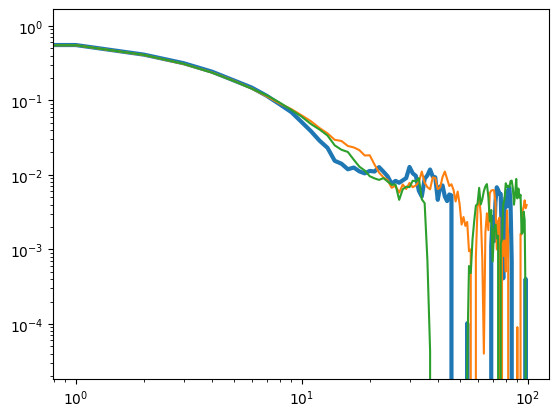

In [11]:
plt.loglog(nmr_result.t[:100], nmr_result.gij[0][:100]/nmr_result.gij[0][0], '-', linewidth=3)
plt.loglog(nmr_result.t[:100], 6*nmr_result.gij[1][:100]/nmr_result.gij[0][0])
plt.loglog(nmr_result.t[:100], 1.5*nmr_result.gij[2][:100]/nmr_result.gij[0][0])

In [ ]:
            #if m == 0:
            #    F_val.append(self.alpha_m[m] * (3*np.cos(self.theta)**2-1) * np.sqrt(5/16/np.pi) / np.power(self.r, 3))
            #elif m == 1:
            #    F_val.append(self.alpha_m[m] * (- np.exp(self.phi*1j) * np.sin(self.theta) * np.cos(self.theta) * np.sqrt(15/8/np.pi)) / np.power(self.r, 3))
            #elif m == 2:
            #    F_val.append(self.alpha_m[m] * (np.exp(2*self.phi*1j) * np.sin(self.theta)**2 * np.sqrt(15/32/np.pi)) / np.power(self.r, 3))

            #if m == 0:
            #    F_val.append((3*np.cos(self.theta)**2-1) / np.power(self.r, 3))
            #elif m == 1:
            #    F_val.append((-np.exp(self.phi*1j) * np.sin(self.theta) * np.cos(self.theta)) / np.power(self.r, 3))
            #elif m == 2:
            #    F_val.append((np.exp(self.phi*2j) * np.sin(self.theta)**2) / np.power(self.r, 3))

            #if m == 0:
            #    F_val.append((((3*self.rij[2]**2)/(self.rij[0]**2+self.rij[1]**2+self.rij[2]**2))-1) / np.power(self.r, 3))
            #elif m == 1:
            #    F_val.append(((-self.rij[2]*(self.rij[0]+self.rij[1]*1j))/(self.rij[0]**2+self.rij[1]**2+self.rij[2]**2)) / np.power(self.r, 3))
            #elif m == 2:
            #    F_val.append((((self.rij[0]+self.rij[1]*1j)**2)/(self.rij[0]**2+self.rij[1]**2+self.rij[2]**2)) / np.power(self.r, 3))


In [ ]:

# Create a new test for that

m = 0
theta = np.arange(-np.pi, np.pi, np.pi/1000)
phi = theta*0.2

plt.plot(theta, sph_harm(m, 2, phi, theta), '.')
plt.plot(theta, (3*np.cos(theta)**2-1) * np.sqrt(5/16/np.pi), '-')


In [ ]:
m = 1
theta = np.arange(-2*np.pi, 2*np.pi, np.pi/1000)
phi = theta*0.2

plt.plot(theta/np.pi, np.real(sph_harm(m, 2, phi, theta)), '.')
#plt.plot(theta/np.pi, np.real(- np.exp(phi*1j) * np.sin(2*theta) * np.sqrt(30/8/np.pi)), '-')
plt.plot(theta/np.pi, np.real(np.exp(phi*1j) * np.sin(theta) * np.cos(theta) * np.sqrt(15/8/np.pi)), '-')

In [ ]:
m = 2
theta = np.arange(-2*np.pi, 2*np.pi, np.pi/1000)
phi = theta*0.2

plt.plot(theta/np.pi, np.real(sph_harm(m, 2, phi, theta)), '.')
plt.plot(theta/np.pi, np.real(np.exp(phi*2j) * np.sin(theta)**2 * np.sqrt(15/32/np.pi)), '-')

In [ ]:
sph_harm(m, 2, phi, theta)[-2]

In [ ]:
(- np.exp(phi*1j) * np.sin(theta) * np.cos(theta) * np.sqrt(15/8/np.pi))[-2]

In [ ]:
from scipy.special import legendre

legendre(3)

In [ ]:
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
l = 1    #degree
m = 0    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12,10))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^0_ 1|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

# Extract results

In [ ]:
T1 = np.round(nmr_result.T1,2)
print(f"NMR relaxation time T1 = {T1} s")

#### Plot the spectrum

Note: here, one figure is made for the light mode of the documentation, the other one for the dark mode

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
myred= [255/ 255, 77/255, 77/ 255]

In [ ]:
import sys
sys.path.append('../shared/')
from tools import figure_improvement, save_figure

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.f[:-60], 1/nmr_result.R1[:-60], 'o', markersize=8, color=myblue)
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$f$ (MHz)", ylabel=r'$T_1$ (s)',
                       xlim=(5e2, 3e5), ylim=(1, 100))
    save_figure(plt, fig, mode, name='T1')

# Plot the correlation function

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.t[:-20], nmr_result.gij[0][:-20], 'o', markersize=8, color=myblue)
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$t$ (ps)", ylabel=r'$G$ (m$^{-6}$)',
                       xlim=(1, 100), ylim=(1e7, 1e11))
    save_figure(plt, fig, mode, name='Gij')

# Intra/Inter motion

In [ ]:
nmr_result_intra = nmrmd.NMR(u, group_i, type_analysis="intra_molecular", number_i=0)
nmr_result_inter = nmrmd.NMR(u, group_i, type_analysis="inter_molecular", number_i=20)

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.f[:-60], nmr_result.R1[:-60], 'o', markersize=8, color=myblue, label="Total")
    ax1.loglog(nmr_result_intra.f[:-60], nmr_result_intra.R1[:-60], 'o', markersize=8, color=myred, label="Intra-molecular")
    ax1.loglog(nmr_result_inter.f[:-60], nmr_result_inter.R1[:-60], 'o', markersize=8, color=mygray, label="Inter-molecular")
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$f$ (MHz)", ylabel=r'$R_1$ (s$^{-1}$)',
                       xlim=(5e2, 3e5), ylim=(0.01, 1))
    save_figure(plt, fig, mode, name='R1-intra-inter')

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.t, nmr_result.gij[0], 'o', markersize=8, color=myblue, label="Total")
    ax1.loglog(nmr_result_intra.t, nmr_result_intra.gij[0], 'o', markersize=8, color=myred, label="Intra-molecular")
    ax1.loglog(nmr_result_inter.t, nmr_result_inter.gij[0], 'o', markersize=8, color=mygray, label="Inter-molecular")
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$t$ (ps)", ylabel=r'$G$ (m$^{-6}$)',
                       xlim=(1, 100), ylim=(1e7, 1e11))
    save_figure(plt, fig, mode, name='Gij-intra-inter')